## HEPOM Exploratory  
------------
Here we implement a few functions for exploring the provided json data in HEPOM. Specifically, we show here how to extract critical information outlined in the manuscript including: 
- Reactant/Product Geometries 
- Thermodynamic Properties 
- 

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(df, label_key="dG_sp"):
    labels = df[label_key]
    plt.hist(labels, bins=20)
    plt.xlabel(label_key)
    plt.ylabel("Count")
    plt.title(f"Distribution of {label_key}")
    
def plot_number_of_bonds_changed(df):
    # get number of bonds formed 
    bonds_formed = df.apply(lambda x: len(x["bonds_formed"]), axis=1)
    # get number of bonds broken
    bonds_broken = df.apply(lambda x: len(x["bonds_broken"]), axis=1)
    # sum them up
    total_bonds_changed = bonds_formed + bonds_broken
    # plot histogram
    plt.hist(total_bonds_changed, bins=5)
    plt.xlabel("Number of bonds changed")
    plt.ylabel("Count")
    plt.title("Number of bonds changed")


In [46]:
import pandas as pd 
dataset_location = "/home/santiagovargas/dev/bondnet/tests/data/testdata/hydro_funct.json"
# read the dataset 
dataset = pd.read_json(dataset_location)


Relevant columns are the following: 
- combined_reactants_graph/combined_products_graph - pymatgen moleculegraph objects, store the combined set of products and reactants at large separations.
- reactants_graph/products_graph - list of pymatgen moleculegraph objects, each entry is a species
- charge - integer with overall reaction charge.
- product/reactant_bonds - list of lists, enumerates the bonds present in the products/reactants.
- bonds_broken - list of lists, contains bonds broken during the reaction. 
- bonds_formed - list of lists, contains bonds formed during the reaction. 
- dG_sp - float, free energy differece between the reactants and products (product free energy - reactant free energy).
- functional_group_reacted - string, contains the functional group that undergoes the hydrolysis reaction as per our reaction templates. 
- composition - dictionary, keys are elements and the values are a count of the number of each atom in the reaction species. 

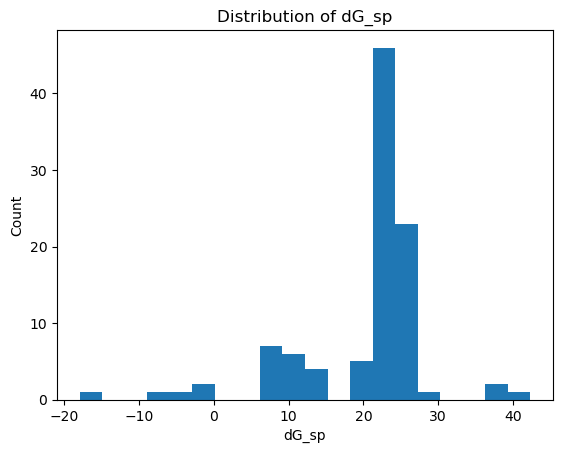

In [48]:
# plot the distribution of the labels
plot_label_distribution(dataset)

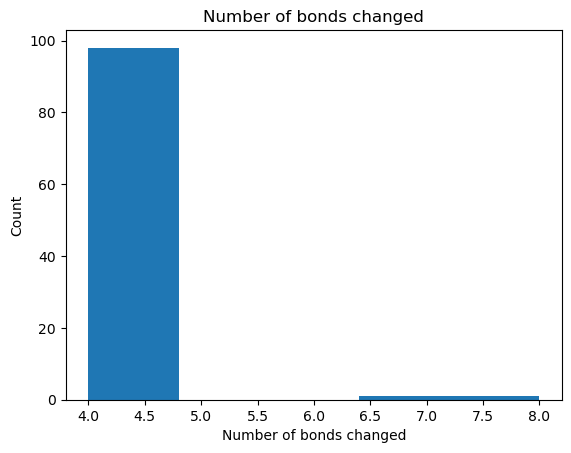

In [49]:
# plot number of bonds changed
plot_number_of_bonds_changed(dataset)

In [ ]:
# PMG moleculegraph objects can be retrieved as dictionaries, atomic identity and positions can be 
# extracted via "graphs" --> "nodes". This yields a list of dictionaries with atomic information:
dataset.combined_reactants_graph.iloc[0]['graphs']['nodes'][0]

{'specie': 'C',
 'coords': [0.9097986789, 1.6721690908, -0.3254513932],
 'properties': {},
 'id': 0}

In [96]:
from pymatgen.core import Molecule
selector = "reactants"
file_name = "test.xyz"
ind = 0

# This can be exported to xyz files via the following helper
def write_molecule_to_xyz(dataset, ind, selector, file_name):
    """
    Writes a molecule to an xyz file
    Takes:
        dataset: pandas dataframe
        ind: index of the molecule in the dataset
        selector: "reactants" or "products"
        file_name: name of the file to write to
    Returns: 
        mol_str: string representation of the molecule
    """
    key = "combined_{0}_graph".format(selector)
    row = dataset[key].iloc[ind]
    molecule = Molecule.from_dict(row['molecule'])
    mol_str = molecule.to(file_name, "xyz")
    return mol_str

mol_str = write_molecule_to_xyz(dataset, ind, selector, file_name)
print(mol_str)

20
H10 C4 N2 O4
C 0.909799 1.672169 -0.325451
C 0.186394 0.375090 -0.017284
O 0.432634 -0.591277 -1.046249
C -0.410966 -0.607530 -2.100970
N -0.042216 -1.523604 -3.007278
O -1.383012 0.132374 -2.196004
C 0.618874 -0.218054 1.315550
N 0.987532 -1.500825 1.326496
O 0.594921 0.493459 2.327576
H 1.992756 1.502667 -0.376941
H 0.557811 2.069243 -1.285006
H 0.700476 2.411875 0.455047
H -0.896367 0.543937 0.059898
H 0.768755 -2.108021 -2.854528
H -0.595505 -1.640305 -3.844743
H 1.000919 -2.046561 0.474875
H 1.264486 -1.932587 2.199456
O 0.922148 0.028007 -0.060696
H 0.642545 -0.674747 -0.660973
H 1.886792 -0.005777 -0.089554
